In [554]:
min_length = 4000
min_count = 0

contig_to_bundles = {}
bundle_to_contigs = {}
reference_contig_names = set()
repeat_bundles = set()
with open("/wd/KIR_hackathon/assembly_alnmap/assemble_results.bed") as f:
#with open("/wd/KIR_hackathon/assembly_alnmap/HLA-ClassII_seq.bed") as f:
    for r in f:
        if r[0] == "#":
            continue
        r = r.strip().split()
        (contig_name, bgn, end, bundle) = r
        bgn = int(bgn)
        end = int(end)
        if end - bgn < min_length:
            continue
        
        bundle = bundle.split(":")
        bundle_id = int(bundle[0])
        #if bundle[-1] != "U":
        #    repeat_bundles.add(bundle_id)
        #    continue
        
        
        contig_to_bundles.setdefault(contig_name, [])
        contig_to_bundles[contig_name].append( (bundle_id, bgn, end) )
       
        bundle_to_contigs.setdefault(bundle_id, [])
        bundle_to_contigs[bundle_id].append( (contig_name, bgn, end) )

In [555]:
bundles_of_interest = {}

for bundle_id in bundle_to_contigs:
    
    bundles = bundle_to_contigs[bundle_id]
    
    length = sum( [ _[2]-_[1] for _ in bundles] )
    count = len(bundles)
    
    if count < min_count:
        continue
        
    if length / count < min_length:
        continue

    bundles_of_interest[bundle_id] = count

In [556]:
#bundles_of_interest

In [557]:
import networkx as nx

In [747]:

edges = {}
nodes_of_interest = set() 
contigs_of_interest = set(["KIR48JW_32_asm_ctg_m::ctg000000_P_292_136195_0"])
#contig_of_interest = "cB01~tA01_GU182345.1/1203312"
#contigs_of_interest = ""
edges_of_interest = set()
ctgs_of_interest = set()
bundle_count = {}
for ctg, bundles in contig_to_bundles.items():
    filtered_bundles = []
    last_uniq_bundle = None
    for idx0 in range(len(bundles)):
        #print(bundles[idx0][0], bundles[idx0][0] in bundles_of_interest)
        if bundles[idx0][0] in bundles_of_interest:      
            filtered_bundles.append(bundles[idx0])
            
    
    #print(ctg)
    if ctg in contigs_of_interest:
        #print(filtered_bundles)
        nodes_of_interest.update([_[0] for _ in filtered_bundles])
        ctgs_of_interest.add(ctg)
        for idx0 in range(len(filtered_bundles)-1):
            idx1 = idx0 + 1
            v, w = int(filtered_bundles[idx0][0]),int(filtered_bundles[idx1][0])
            edges_of_interest.add( (v, w) )
                
    s = set([_[0] for _ in filtered_bundles])
    if 1 not in s or 2 not in s or 6 not in s:
        continue
    for idx0 in range(len(filtered_bundles)-1):
        idx1 = idx0 + 1
   
        v, w = int(filtered_bundles[idx0][0]),int(filtered_bundles[idx1][0])

        edges.setdefault( (v,w) ,0)
        edges[(v,w)] += 1
   
   

nodes = set()        
g = nx.DiGraph()

for v, w in edges:
    weight = edges[ (v, w) ]
    if weight < 6:
        continue
    v_count = bundles_of_interest[v]
    w_count = bundles_of_interest[w]
    v_node = "{}:{}".format(v, v_count)
    w_node = "{}:{}".format(w, w_count)
    
    if v_node not in nodes:
        if v in nodes_of_interest:
            g.add_node(v_node, fillcolor="red", style="filled", shape="rect", height=v_count*0.025)
        else:
            g.add_node(v_node, fillcolor="yellow", style="filled", shape="rect", height=v_count*0.025)
        nodes.add(v_node)
    if w_node not in nodes:
        if w in nodes_of_interest:
            g.add_node(w_node, fillcolor="red", style="filled", shape="rect", height=w_count*0.025)
        else:
            g.add_node(w_node, fillcolor="yellow", style="filled", shape="rect", height=w_count*0.025)
        nodes.add(w_node)
        
    if (v, w) in edges_of_interest:
        g.add_edge( v_node, w_node, weight=weight, penwidth=weight*0.2, label="{}".format(weight), color="red")
    else:
        g.add_edge( v_node, w_node, weight=weight, penwidth=weight*0.2, label="{}".format(weight), color="black")

In [748]:
nodes_of_interest

{2, 6, 12, 13, 26, 27, 28, 30, 38, 45, 49, 78, 88, 89}

In [749]:
nx.write_gexf(g, "/wd/KIR_hackathon/assembly_alnmap/test.gexf")

In [750]:
A = nx.nx_agraph.to_agraph(g)

In [751]:
with open("/wd/KIR_hackathon/assembly_alnmap/test.dot", "w") as f:
    print(A, file=f)

In [752]:
!cd /wd/KIR_hackathon/assembly_alnmap && dot -Tpng -Grankdir=LR -Gratio=0.15 test.dot -O

In [753]:
from IPython.display import SVG, Image

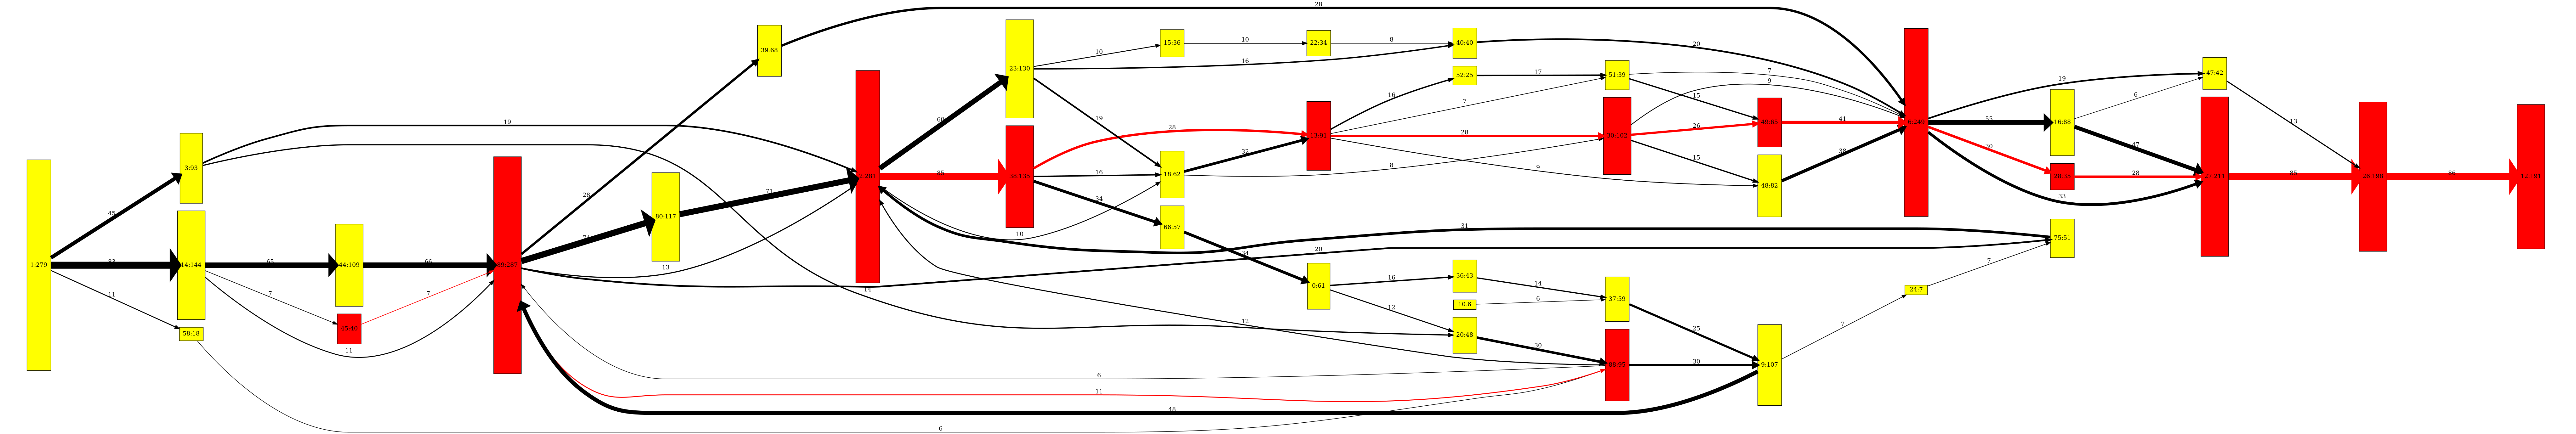

In [754]:
Image("/wd/KIR_hackathon/assembly_alnmap/test.dot.png")

In [417]:
out = open("/wd/KIR_hackathon/assembly_alnmap/assemble_results_filtered.bed", "w")
with open("/wd/KIR_hackathon/assembly_alnmap/assemble_results.bed") as f:
    for r in f:
        if r[0] == "#":
            continue
        r2 = r.strip().split()
        (contig_name, bgn, end, bundle) = r2
        if int(end) - int(bgn) < min_length:
            continue
        bundle = bundle.split(":")
        bundle_id = int(bundle[0])
        if bundle_id not in list(g.nodes()):
            continue
        
    
        print(r.strip(), file=out)
        
      